# Twitter Sentiment Analysis NLP

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# loading the data into a dataframe
df = pd.read_csv("Tweets_ImranKhanPTI.csv")
df.head()

,Unnamed: 0,Tweets
0,0,اپنےہیروزکوخراج عقیدت پیش کرتےہوئےآج 1965 کی ی...
1,1,"As we pay homage to our war heroes today, I st..."
2,2,میں نے وزارت داخلہ کو جسمانی اذیت کیخلاف ہمارے...
3,3,I have asked Interior Ministry to expedite tab...
4,4,انسانی بنیادوں پر غور کیلئے میں نے غیر ملکی او...


In [3]:
# first step is to remove non-english tweets
def remove_non_english_tweets(text):
    if not text.isascii():
        text = re.sub("[0-9]", "", text)
        text = text.encode('ascii', 'ignore').decode('ascii')
       
    return text

In [4]:
# apply the remove_non_english_tweets method to cleaned column
df["cleaned"] = df["Tweets"].apply(remove_non_english_tweets)

# replace all the rows with multiple spaces by nan
df["cleaned"].replace(r"  ", np.nan, regex=True, inplace=True)

# drop all the rows with nan
df.dropna(inplace=True, axis=0)

# reset the indices
df.reset_index(inplace=True)

In [5]:
df.head()

,index,Unnamed: 0,Tweets,cleaned
0,1,1,"As we pay homage to our war heroes today, I st...","As we pay homage to our war heroes today, I st..."
1,3,3,I have asked Interior Ministry to expedite tab...,I have asked Interior Ministry to expedite tab...
2,6,6,I have also asked for immediate reports on for...,I have also asked for immediate reports on for...
3,7,7,"After a mtg with @mohrpakistan, Attorney Gener...","After a mtg with @mohrpakistan, Attorney Gener..."
4,13,13,The brave Kashmiris who are fighting against t...,The brave Kashmiris who are fighting against t...


In [6]:
# tweets contain tweets in urdu language as well which we'll be removing
# There might be some special characters
# RT should be removed as well 
# for all this, lets create a function
def clean_text(text):
    text = re.sub("[^a-zA-z]", " ", text)
    text = text.lower()
    text = re.sub("amp", "", text)
    return text

In [7]:
# applying the created function to clean the tweet
df["cleaned_tweets"] = df["cleaned"].apply(clean_text)

In [8]:
df.head()

,index,Unnamed: 0,Tweets,cleaned,cleaned_tweets
0,1,1,"As we pay homage to our war heroes today, I st...","As we pay homage to our war heroes today, I st...",as we pay homage to our war heroes today i st...
1,3,3,I have asked Interior Ministry to expedite tab...,I have asked Interior Ministry to expedite tab...,i have asked interior ministry to expedite tab...
2,6,6,I have also asked for immediate reports on for...,I have also asked for immediate reports on for...,i have also asked for immediate reports on for...
3,7,7,"After a mtg with @mohrpakistan, Attorney Gener...","After a mtg with @mohrpakistan, Attorney Gener...",after a mtg with mohrpakistan attorney gener...
4,13,13,The brave Kashmiris who are fighting against t...,The brave Kashmiris who are fighting against t...,the brave kashmiris who are fighting against t...


In [9]:
# finally, to clean the tweets, lets remove the stopwords
def eliminate_stopwords_lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    temp = text.split()
    temp = [lemmatizer.lemmatize(word) for word in temp if word not in stopwords.words("english")]
    temp = " ".join(temp)
    
    return temp

In [10]:
df["final_tweets"] = df["cleaned_tweets"].apply(eliminate_stopwords_lemmatize)

In [11]:
df.head()

,index,Unnamed: 0,Tweets,cleaned,cleaned_tweets,final_tweets
0,1,1,"As we pay homage to our war heroes today, I st...","As we pay homage to our war heroes today, I st...",as we pay homage to our war heroes today i st...,pay homage war hero today still recall yr old ...
1,3,3,I have asked Interior Ministry to expedite tab...,I have asked Interior Ministry to expedite tab...,i have asked interior ministry to expedite tab...,asked interior ministry expedite tabling anti ...
2,6,6,I have also asked for immediate reports on for...,I have also asked for immediate reports on for...,i have also asked for immediate reports on for...,also asked immediate report foreign woman pris...
3,7,7,"After a mtg with @mohrpakistan, Attorney Gener...","After a mtg with @mohrpakistan, Attorney Gener...",after a mtg with mohrpakistan attorney gener...,mtg mohrpakistan attorney general barrister al...
4,13,13,The brave Kashmiris who are fighting against t...,The brave Kashmiris who are fighting against t...,the brave kashmiris who are fighting against t...,brave kashmiri fighting worst form military op...


In [12]:
# creating a function to get the subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [13]:
# creating a function to get the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
# creating new columns for subjectivity and polarity for each tweet
df["subjectivity"] = df["final_tweets"].apply(get_subjectivity)
df["polarity"] = df["final_tweets"].apply(get_polarity)

In [15]:
df.head()

,index,Unnamed: 0,Tweets,cleaned,cleaned_tweets,final_tweets,subjectivity,polarity
0,1,1,"As we pay homage to our war heroes today, I st...","As we pay homage to our war heroes today, I st...",as we pay homage to our war heroes today i st...,pay homage war hero today still recall yr old ...,0.475,0.01875
1,3,3,I have asked Interior Ministry to expedite tab...,I have asked Interior Ministry to expedite tab...,i have asked interior ministry to expedite tab...,asked interior ministry expedite tabling anti ...,0.100,0.10000
2,6,6,I have also asked for immediate reports on for...,I have also asked for immediate reports on for...,i have also asked for immediate reports on for...,also asked immediate report foreign woman pris...,0.125,-0.12500
3,7,7,"After a mtg with @mohrpakistan, Attorney Gener...","After a mtg with @mohrpakistan, Attorney Gener...",after a mtg with mohrpakistan attorney gener...,mtg mohrpakistan attorney general barrister al...,0.500,0.05000
4,13,13,The brave Kashmiris who are fighting against t...,The brave Kashmiris who are fighting against t...,the brave kashmiris who are fighting against t...,brave kashmiri fighting worst form military op...,0.725,0.02500


In [16]:
# lets clean the dataframe by dropping all the unnecessary columns
# copying the original dataframe to avoid mistakenly changing it and avoiding the warning
df_tweets = df.copy()

# dropping all the unwanted columns. This can be done in one line by specifying all the columns to drop function
df_tweets = df_tweets.drop(["index"], axis=1)
df_tweets = df_tweets.drop(["Unnamed: 0"], axis=1)
df_tweets = df_tweets.drop(["Tweets"], axis=1)
df_tweets = df_tweets.drop(["cleaned"], axis=1)
df_tweets = df_tweets.drop(["cleaned_tweets"], axis=1)
# renaming the cleaned_tweets to tweets
df_tweets.rename(columns={"final_tweets":"tweets"}, inplace=True)

In [17]:
df_tweets.head()

,tweets,subjectivity,polarity
0,pay homage war hero today still recall yr old ...,0.475,0.01875
1,asked interior ministry expedite tabling anti ...,0.100,0.10000
2,also asked immediate report foreign woman pris...,0.125,-0.12500
3,mtg mohrpakistan attorney general barrister al...,0.500,0.05000
4,brave kashmiri fighting worst form military op...,0.725,0.02500


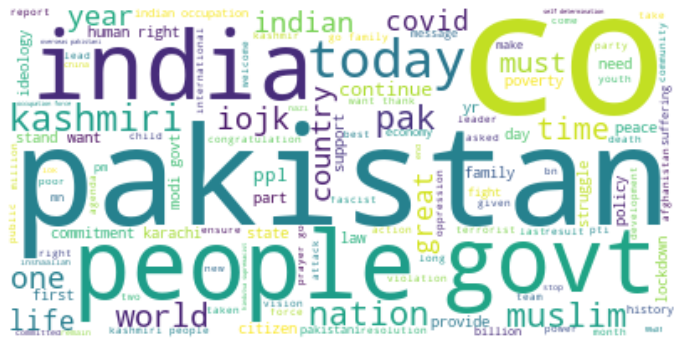

In [18]:
# lets create a word cloud to see the frequency of appearing words
words = " ".join([tweet for tweet in df_tweets["tweets"]])

# generating the word cloud from all the words got from the tweets
wordCloud = WordCloud(random_state=7, background_color="white").generate(words)

# plotting the word cloud
plt.figure(figsize=(12,14))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [19]:
# lets mark the sentiments to postive, negative or neutral based on the polarity score
def get_sentiment(polarity):
    if polarity == 0:
        return "Neutral"
    elif polarity > 0:
        return "Positive"
    else:
        return "Negative"

In [20]:
# applying the function to the polarity column and creating a new column called sentiment
df_tweets["sentiment"] = df_tweets["polarity"].apply(get_sentiment)

In [21]:
df_tweets.head()

,tweets,subjectivity,polarity,sentiment
0,pay homage war hero today still recall yr old ...,0.475,0.01875,Positive
1,asked interior ministry expedite tabling anti ...,0.100,0.10000,Positive
2,also asked immediate report foreign woman pris...,0.125,-0.12500,Negative
3,mtg mohrpakistan attorney general barrister al...,0.500,0.05000,Positive
4,brave kashmiri fighting worst form military op...,0.725,0.02500,Positive


Text(0, 0.5, 'Subjectivity')

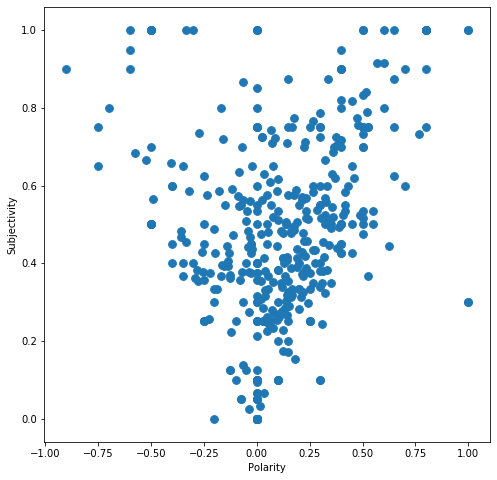

In [22]:
# to get a better understanding of the sentiments, lets plot them
plt.figure(figsize=(8,8))

plt.scatter(df_tweets["polarity"], df_tweets["subjectivity"], s=60)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

In [23]:
positives = df_tweets[df_tweets["sentiment"] == "Positive"].count() / df_tweets.count() * 100
print("Positive tweets: ", round(positives[0], 2), "%")
negatives = df_tweets[df_tweets["sentiment"] == "Negative"].count() / df_tweets.count() * 100
print("Negative tweets: ", round(negatives[0], 2), "%")
neutrals = df_tweets[df_tweets["sentiment"] == "Neutral"].count() / df_tweets.count() * 100
print("Neutral tweets: ", round(neutrals[0], 2), "%")

Positive tweets:  55.56 %
Negative tweets:  23.31 %
Neutral tweets:  21.13 %


From above analysis, we can say that **55.56%** of the tweets from Imran Khan are **positive** and **23.31%** are **negative**.